<a href="https://colab.research.google.com/github/Shantanu0113/Hotel-Booking-Analysis/blob/main/Shantanu_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",50)

In [2]:
#mounting the drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#storing the data in dataframe
hotel= pd.read_csv('/content/drive/MyDrive/Hotel booking analysis /Hotel Bookings.csv')

In [4]:
#viewing the first 5 rows
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
print(hotel.shape) #to get the number of rows and columns
hotel.describe()

(119390, 32)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
hotel.index

RangeIndex(start=0, stop=119390, step=1)

In [7]:
hotel.info()  #checking the data for number of entries and datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#checking for null values
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
#calculating the percentage of null values in the columns
print((hotel.isnull().sum()/len(hotel.index))*100)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

###We have about 13% and 94% of the data null in the columns 'Agent' and 'Company' repectively. This is a large percentage of the data and thus cannot be used for analysis and visualization. Thus we have to drop the columns.

In [10]:
#dropping the column
hotel = hotel.drop(['company'], axis=1)

In [12]:
#replacing the null values in the column with 0
hotel['agent'] = hotel['agent'].fillna(0)

In [13]:
hotel.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

###The column country still has some null values which is about 0.408%. As it is a small percentage we can drop the rows as it won't affect our analysis. The same is to be done with the null values for children.

In [14]:
hotel=hotel.dropna(axis=0) #dropping rows with null values in them

In [15]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

###Renaming the columns to make it easy to understand and later call during analysis.

In [16]:
print(list(hotel.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [17]:
hotel.columns = ['Hotel_name', 'Canceled', 'Lead_time', 'Visit_year', 'Visit_month', 'Visit_week', 'Visit_date', 'Weekend_stay', 'Weekday_stay', 'Adults', 'Children', 'Babies', 'Meal', 'Country', 'Segment', 'Dist_channel', 'Repeated_guest', 'Prev_cancel', 'Prev_bookings', 'Reserved_room', 'Assigned_room', 'Change_booking', 'Deposit_type','Agent', 'Waiting_days', 'Customer_type', 'ADR', 'Parking_space', 'Special_requests', 'Reservation_status', 'Reservation_date']

###Next we need to check for outliers in the data as it could affect our analysis.

In [18]:
#checking the unique data in the columns
list_unique = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
list_unique.columns = ["name" , "unique"]

In [19]:
list_unique

,name,unique
0,Hotel_name,2
1,Canceled,2
2,Lead_time,479
3,Visit_year,3
4,Visit_month,12
5,Visit_week,53
6,Visit_date,31
7,Weekend_stay,15
8,Weekday_stay,33
9,Adults,14


In [20]:
total_var= set(hotel.columns)
cat_var = set(list_unique.name[(list_unique.unique < 14) |
                               (list_unique.name =='Country')])
con_var = total_var - cat_var
print('Categorical variables(',len(cat_var),')\n',cat_var,'\n\n'
      'Continuous variables(',len(con_var),') \n',con_var,)

Categorical variables( 18 )
 {'Special_requests', 'Repeated_guest', 'Country', 'Visit_month', 'Dist_channel', 'Babies', 'Canceled', 'Meal', 'Assigned_room', 'Reservation_status', 'Visit_year', 'Parking_space', 'Segment', 'Reserved_room', 'Hotel_name', 'Deposit_type', 'Customer_type', 'Children'} 

Continuous variables( 13 ) 
 {'Weekday_stay', 'Agent', 'Change_booking', 'Lead_time', 'Prev_bookings', 'Visit_date', 'Waiting_days', 'ADR', 'Reservation_date', 'Visit_week', 'Adults', 'Weekend_stay', 'Prev_cancel'}


###Testing the data set for outliers by taking a few entires and plotting box plot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

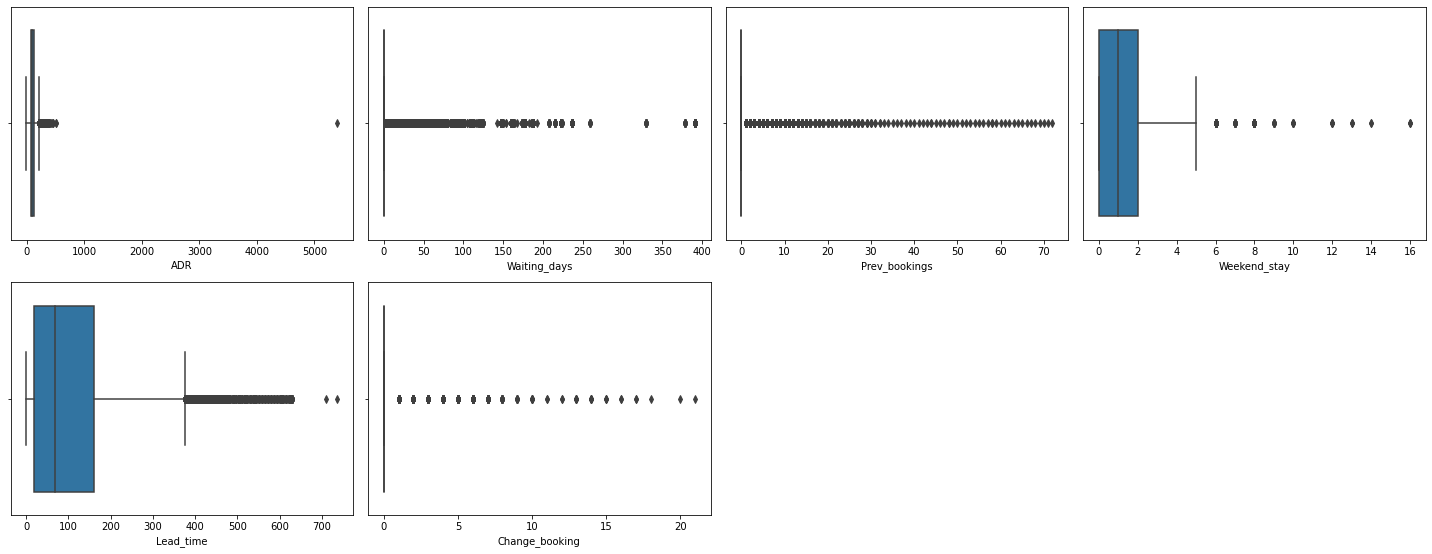

In [21]:
#testing the data for outliers
test_list = ['ADR', 'Waiting_days', 'Prev_bookings', 'Weekend_stay', 'Lead_time', 'Change_booking']
plt.figure(figsize=(20,15))
n=1
for test in test_list:
  plt.subplot(4,4,n)
  sns.boxplot(hotel[test])
  n=n+1
  plt.tight_layout()

###So we can see that there are outliers present that need to be treated. Thus we will now check the data for outliers and then work on them.

In [22]:
hotel[con_var].describe()

,Weekday_stay,Agent,Change_booking,Lead_time,Prev_bookings,Visit_date,Waiting_days,ADR,Visit_week,Adults,Weekend_stay,Prev_cancel
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,2.502145,74.896264,0.221181,104.311435,0.131634,15.800880,2.330754,102.003243,27.166555,1.858391,0.928897,0.087142
std,1.900168,107.145761,0.652785,106.903309,1.484672,8.780324,17.630452,50.485862,13.589971,0.578576,0.996216,0.845869
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,0.000000,18.000000,0.000000,8.000000,0.000000,70.000000,16.000000,2.000000,0.000000,0.000000
50%,2.000000,9.000000,0.000000,69.000000,0.000000,16.000000,0.000000,95.000000,28.000000,2.000000,1.000000,0.000000
75%,3.000000,152.000000,0.000000,161.000000,0.000000,23.000000,0.000000,126.000000,38.000000,2.000000,2.000000,0.000000
max,41.000000,535.000000,21.000000,737.000000,72.000000,31.000000,391.000000,5400.000000,53.000000,55.000000,16.000000,26.000000


##Summary statistics was performed and the columns from the continuous variables that have outliers are:
* Weekday_stay
* Waiting_days
* Weekend_stay
* Prev_booking
* Prev_cancel
* Adults
* Lead_time
* ADR


In [23]:
#treating the outliers
#replacing the outliers with acceptable values
hotel.loc[hotel.Prev_bookings > 0, 'Prev_bookings'] = 1
hotel.loc[hotel.Prev_cancel > 0, 'Prev_cancel'] = 1
hotel.loc[hotel.Adults > 4, 'Adults'] = 4
hotel.loc[hotel.Lead_time > 500, 'Lead_time'] = 500
hotel.loc[hotel.ADR > 600, 'ADR'] = 600

In [25]:
hotel[cat_var].describe()

,Special_requests,Repeated_guest,Babies,Canceled,Visit_year,Parking_space,Children
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.571683,0.032011,0.007948,0.371352,2016.157656,0.061885,0.104207
std,0.792678,0.176029,0.097380,0.483168,0.707459,0.244172,0.399172
min,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,2017.000000,0.000000,0.000000
max,5.000000,1.000000,10.000000,1.000000,2017.000000,8.000000,10.000000


###Observed outliers are in the columns:
* Babies
* Parking_space
* Children

In [26]:
#treating the outliers
hotel.loc[hotel.Babies > 3, 'Babies'] = 0
hotel.loc[hotel.Children > 4, 'Children'] = 0
hotel.loc[hotel.Parking_space > 5, 'Parking_space'] = 5

###Preparation of the data.

In [28]:
#To find the total number of occupants.
#first to find the total number of kids.
hotel['Children'] = hotel['Children'].astype('int64')
hotel['Kids'] = hotel.Children + hotel.Babies

hotel['Occupants'] = hotel.Adults + hotel.Kids
hotel['Total_stay'] = hotel.Weekend_stay + hotel.Weekday_stay

In [29]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Hotel_name          118898 non-null  object 
 1   Canceled            118898 non-null  int64  
 2   Lead_time           118898 non-null  int64  
 3   Visit_year          118898 non-null  int64  
 4   Visit_month         118898 non-null  object 
 5   Visit_week          118898 non-null  int64  
 6   Visit_date          118898 non-null  int64  
 7   Weekend_stay        118898 non-null  int64  
 8   Weekday_stay        118898 non-null  int64  
 9   Adults              118898 non-null  int64  
 10  Children            118898 non-null  int64  
 11  Babies              118898 non-null  int64  
 12  Meal                118898 non-null  object 
 13  Country             118898 non-null  object 
 14  Segment             118898 non-null  object 
 15  Dist_channel        118898 non-nul

In [30]:
#changing the date to datetime format
import datetime
from time import strptime

hotel['Reservation_date'] = pd.to_datetime(hotel['Reservation_date'])

In [32]:
hotel.duplicated().sum() #checking for duplicate values

32004

In [34]:
hotel = hotel.drop_duplicates(keep='first') #removing all duplicate values excluding first

In [35]:
hotel.shape   #checking shape after removing duplicates

(86894, 34)

In [36]:
hotel.head()

,Hotel_name,Canceled,Lead_time,Visit_year,Visit_month,Visit_week,Visit_date,Weekend_stay,Weekday_stay,Adults,Children,Babies,Meal,Country,Segment,Dist_channel,Repeated_guest,Prev_cancel,Prev_bookings,Reserved_room,Assigned_room,Change_booking,Deposit_type,Agent,Waiting_days,Customer_type,ADR,Parking_space,Special_requests,Reservation_status,Reservation_date,Kids,Occupants,Total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,2


##Q) What is the optimal length of stay for the best daily price?

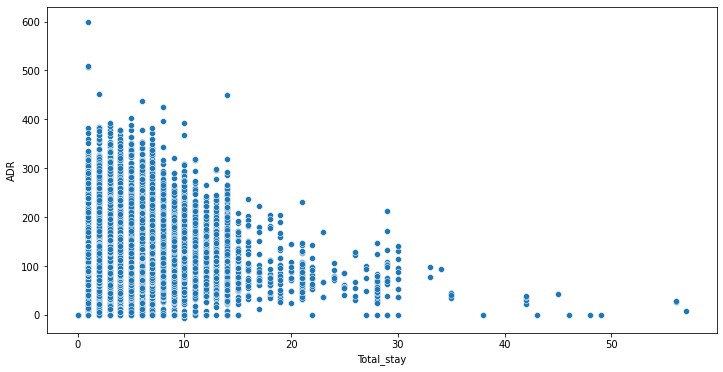

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=hotel, x='Total_stay', y='ADR')  #directly plotting data

Here we can see how the ADR varies with the duration of the stay. As the duration increases the ADR slightly decreases and with the duration more than 2 weeks a noticable difference can be seen.
Thus we can say that the optimal duration of stay for better Average daily rate is roughly around 2 weeks.

##Q) What is the preffered duration of stay for customers?

Text(0, 0.5, 'Number of bookings')

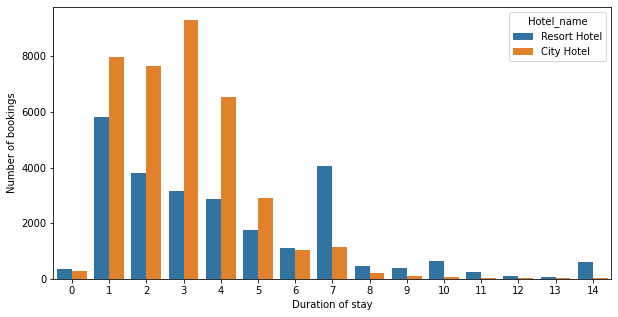

In [38]:
actual_guests = hotel[hotel['Canceled']==0] #obtaining the required data
d1= actual_guests[actual_guests['Total_stay']<15] #taking data for upto 2 weeks
plt.figure(figsize=(10,5))
sns.countplot(x= d1['Total_stay'],hue= d1['Hotel_name'])
plt.xlabel('Duration of stay')
plt.ylabel('Number of bookings')

In the above figure we can observe the number of bookings based on total duration of stay. The most number if bookings are for a period of less than 5 days. After which we can see the bookings decrease.

In [39]:
d1= hotel[hotel['Canceled']==0]

In [40]:
d1.head()

,Hotel_name,Canceled,Lead_time,Visit_year,Visit_month,Visit_week,Visit_date,Weekend_stay,Weekday_stay,Adults,Children,Babies,Meal,Country,Segment,Dist_channel,Repeated_guest,Prev_cancel,Prev_bookings,Reserved_room,Assigned_room,Change_booking,Deposit_type,Agent,Waiting_days,Customer_type,ADR,Parking_space,Special_requests,Reservation_status,Reservation_date,Kids,Occupants,Total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2,2


##Q)What is the booking comaprison for the hotels throughout the year?

Text(0, 0.5, 'Number of bookings')

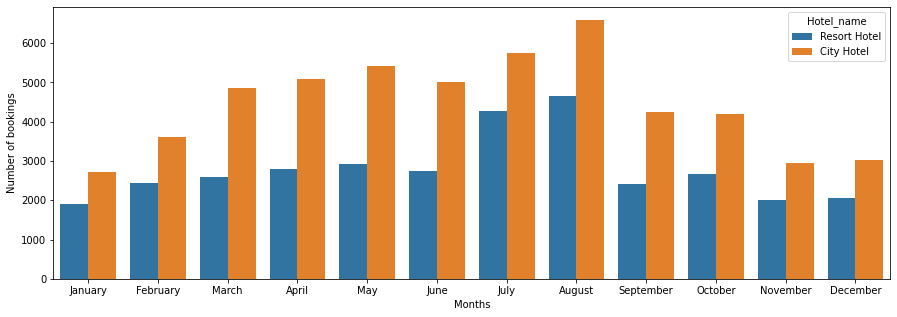

In [41]:
#custom order to be shown while plotting
Months_odr= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize= (15,5))
sns.countplot(x=hotel['Visit_month'], data= hotel, order=Months_odr, hue='Hotel_name')  #plotting the data hotel wise
plt.xlabel('Months')
plt.ylabel('Number of bookings')

The above figure displays the Number of bookings in each hotel shown monthly.
We can infer that the months of July and August have the most bookings for both the hotels. We can also conclude that throughout the year the bookings in City hotel are more than the bookings in Resort hotel.

##Q) What are the number of bookings per year for each hotel?

Text(0, 0.5, 'Number of bookings')

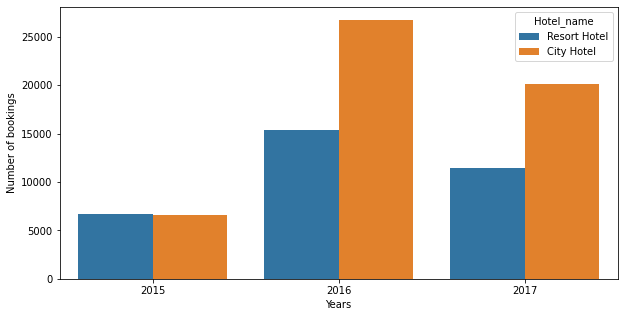

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x= hotel['Visit_year'] ,data=hotel ,hue='Hotel_name') #directly plotting the data
plt.xlabel('Years')
plt.ylabel('Number of bookings')

From the above figure we can see the number of bookings for each year in the data. For the year 2015 the number of bookings for Resort hotel were slighty more than for City hotel. However, in the years 2016 and 2017 the bookings for City hotel are considerably higher than Resort hotel.

##Q) What is the booking variations for the hotels wrt date of the month?

Text(0, 0.5, 'Number of bookings')

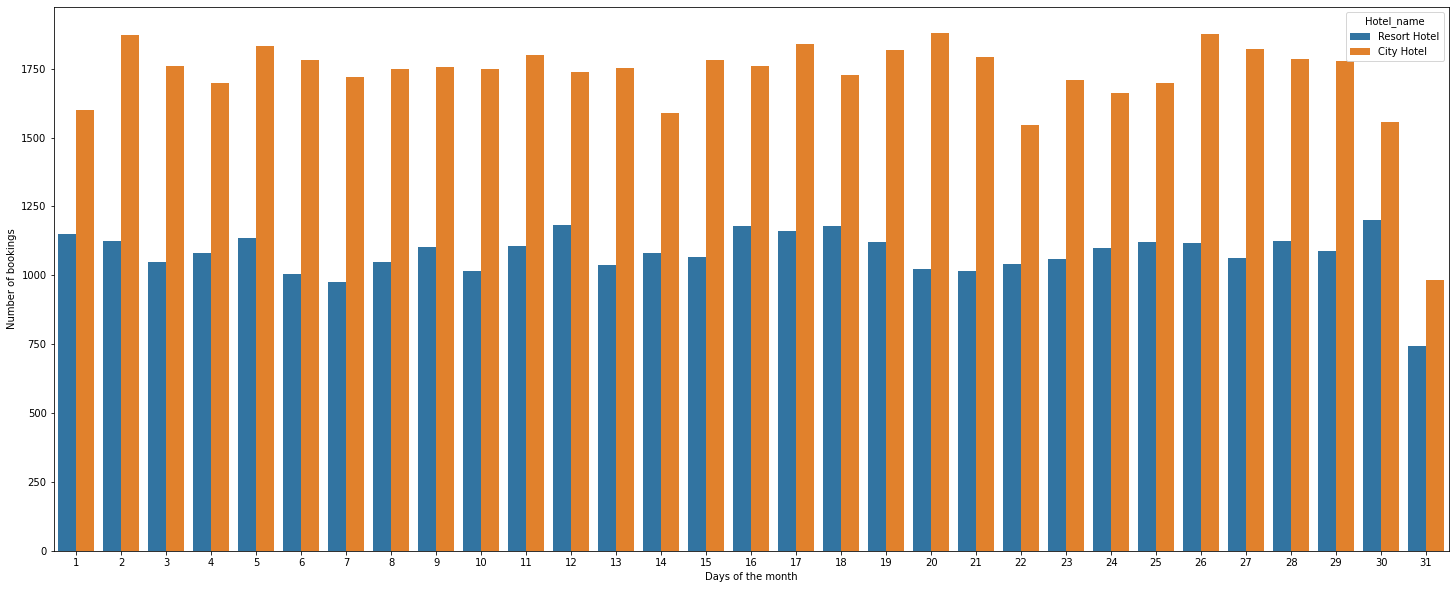

In [43]:
plt.figure(figsize=(25,10))
sns.countplot(x='Visit_date', data=hotel, hue='Hotel_name') #plotting data from the dataframe
plt.xlabel('Days of the month')
plt.ylabel('Number of bookings')

We can see that the bookings throughout the month are fairly the same, with a decrease in the bookings observed by the end of the month.

##Q) What is the variation of the Daily Rate throughout the month?

Text(0, 0.5, 'Average Daily Rate')

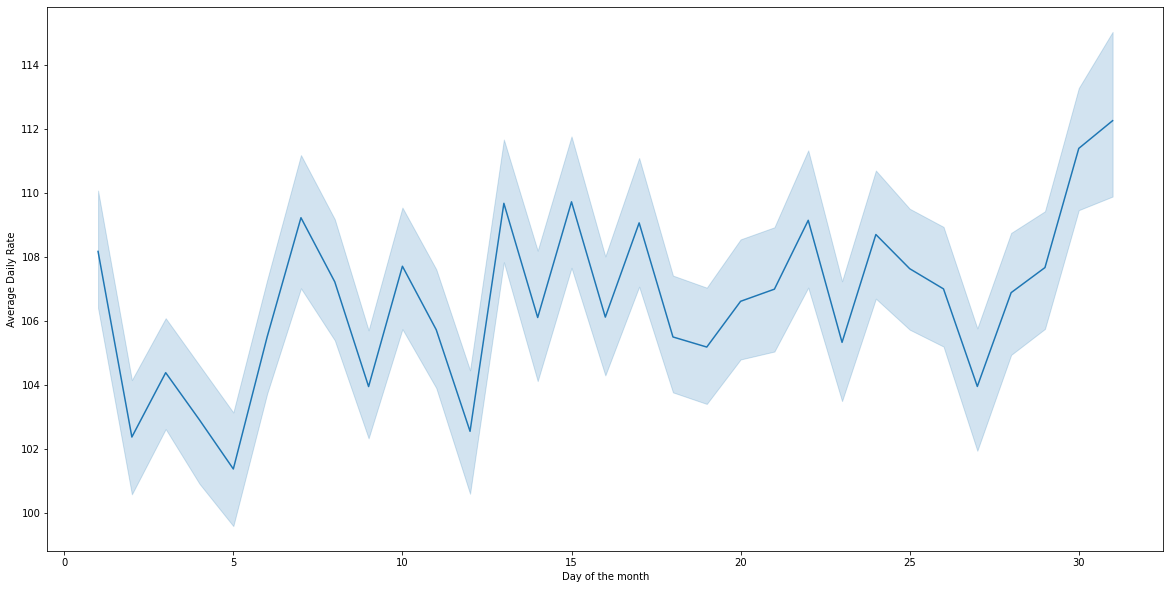

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(x = 'Visit_date', y = 'ADR', data=hotel)   #plotting lineplit for the required data
plt.xlabel('Day of the month')
plt.ylabel('Average Daily Rate')

We can infer that the Average daily rate vaires a lot throughout the year with increase in daily rate being observed on days lower bookings to obtain a good revenue throughout the month. 

##Q) What is the volume of bookings throughout the year based on the Type of Occupants? (Categorized as Single, Couple, Family)

In [47]:
#giving conditions and values for new column
conditions = [(actual_guests['Adults']==1) & (actual_guests['Kids']==0),
  (actual_guests['Adults']==2) & (actual_guests['Kids']==0),
  (actual_guests['Adults']+ actual_guests['Kids']>=2)]

values = ['Single','Couple','Family']

#creating the column using np.select
actual_guests['Type_of_occ'] = np.select(conditions, values)

In [48]:
actual_guests.head(50)

,Hotel_name,Canceled,Lead_time,Visit_year,Visit_month,Visit_week,Visit_date,Weekend_stay,Weekday_stay,Adults,Children,Babies,Meal,Country,Segment,Dist_channel,Repeated_guest,Prev_cancel,Prev_bookings,Reserved_room,Assigned_room,Change_booking,Deposit_type,Agent,Waiting_days,Customer_type,ADR,Parking_space,Special_requests,Reservation_status,Reservation_date,Kids,Occupants,Total_stay,Type_of_occ
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2,0,Couple
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2,0,Couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1,1,Single
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1,1,Single
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,2,2,Couple
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03,0,2,2,Couple
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,0,2,2,Couple
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0,Transient,145.00,0,0,Check-Out,2015-07-05,0,2,4,Couple
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,2015-07-05,0,2,4,Couple
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,241.0,0,Transient,154.77,0,1,Check-Out,2015-07-05,1,3,4,Family


In [49]:
#removing the rows with null values
actual_guests= actual_guests[actual_guests.Type_of_occ!= '0']

In [50]:
#checking for any data with value 0
actual_guests.loc[actual_guests['Type_of_occ']=='0']

,Hotel_name,Canceled,Lead_time,Visit_year,Visit_month,Visit_week,Visit_date,Weekend_stay,Weekday_stay,Adults,Children,Babies,Meal,Country,Segment,Dist_channel,Repeated_guest,Prev_cancel,Prev_bookings,Reserved_room,Assigned_room,Change_booking,Deposit_type,Agent,Waiting_days,Customer_type,ADR,Parking_space,Special_requests,Reservation_status,Reservation_date,Kids,Occupants,Total_stay,Type_of_occ


In [51]:
#changing the month data to categorical data for custom sorting
actual_guests['Visit_month']= pd.Categorical(actual_guests['Visit_month'],Months_odr)

In [52]:
#storing groupby in new variable for plotting
type_df= actual_guests.groupby(['Visit_month','Type_of_occ'],sort= True)['Visit_month'].count().unstack()
type_df

Type_of_occ,Couple,Family,Single
Visit_month,,,
January,2087,352,1152
February,2842,639,1130
March,3583,605,1414
April,3573,815,1070
May,3981,621,1284
June,3685,739,967
July,4311,1864,644
August,4841,2105,653
September,3474,494,1045


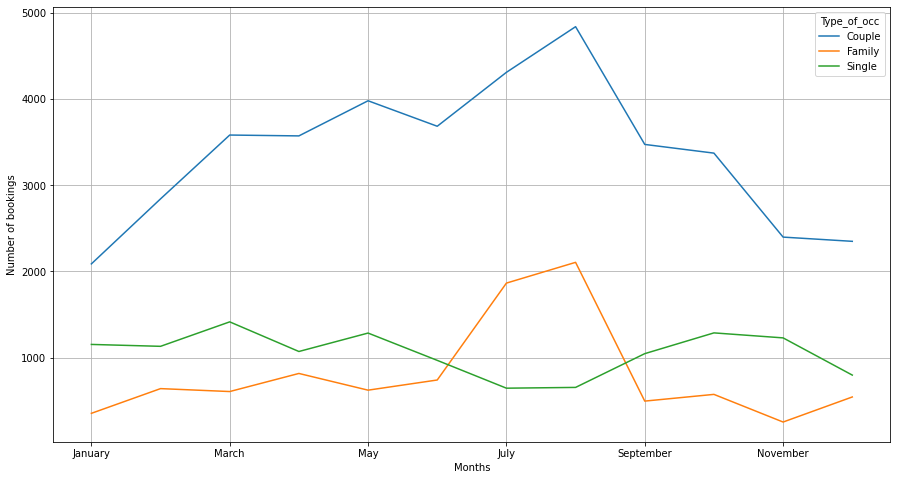

In [53]:
type_df.plot()
plt.gcf().set_size_inches(15, 8)  #using gcf().set_size_inches inplace of figsize for better size of plot
plt.xlabel('Months')
plt.ylabel('Number of bookings')  
plt.grid()                        #done to show the grid for better visualisation

We can see that the booking for Single occupants stay fairly low throughout the year. The bookings for families visiting the hotels have a increase in the months of July and August which were previously observed to be the busiest months. We can see that the most number of bookings in the hotels are made by couples throughout the year for both hotels.